## CH02Data3

In [21]:
import pandas as pd
import numpy as np
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [2]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [5]:
# assemble all of the data into a single DataFrame and further to add a year field
# pandas.concat:
# 2016 is the last available year right now years = range(1880, 2017)
years = range(1880, 2017)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year 
    pieces.append(frame)
# Concatenate everything into a single DataFrame 
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [10]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2012,1756347,1892094
2013,1749061,1885683
2014,1779496,1913434
2015,1776538,1907211
2016,1756647,1880674


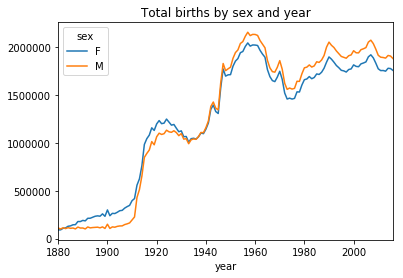

In [13]:
%matplotlib inline
total_births.plot(title='Total births by sex and year')

In [19]:
def add_prop(group):
# Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [22]:
# use np.allclose to check that the group sums are sufficiently close to 1:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [27]:
# extract a subset of the data to facilitate further analysis: 
# the top 1000 names for each sex/year combination. 
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex']) 
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2016 M   1878753      Keanu   M     210  2016  0.000112
         1878754     Konner   M     210  2016  0.000112
         1878755      Brent   M     209  2016  0.000111
         1878756   Immanuel   M     209  2016  0.000111
         1878757    Benicio   M     208  2016  0.000111
         1878758     Ernest   M     208  2016  0.000111
         1878759    Merrick   M     208  2016  0.000111
         1878760    Yisroel   M     208  2016  0.000111
         1878763       Lyle   M     207  2016  0.000110
         1878761      Amare   M     207  2016  0.000110
         1878762        Jad   M     207  2016  0.000110
         1878766     Maddux   M     206  2016  0.000110
         1878764      Creed   M     206  2016  0.000110
         1878765      Krish   M     206  2016  0.000110
         1878768  Giancarlo   M     205  2016  0.000109
         1878769   Jamarion   M     205  2016  0.000109
         1878770      Steve   M     205  2016  0.000109
         1878767     Camilo   M     205  2016  0.000109
         1878771      Anton   M     204  2016  0.000108
         1878772      Jamar   M     204  2016  0.000108
         1878773   Jeremias   M     204  2016  0.000108
         1878774      Ralph   M     204  2016  0.000108
         1878775     Wesson   M     204  2016  0.000108
         1878778    Brenden   M     203  2016  0.000108
         1878779    Eliezer   M     203  2016  0.000108
         1878777    Braeden   M     203  2016  0.000108
         1878776       Bode   M     203  2016  0.000108
         1878780     Davian   M     202  2016  0.000107
         1878781        Gus   M     202  2016  0.000107
         1878782   Jonathon   M     202  2016  0.000107

[273877 rows x 5 columns]

## Analyze Naming Trends

In [28]:
#Splitting the Top 1,000 names into the boy and girl portions :
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [34]:
#form a pivot table of the total number of births by year and name:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births

/Users/congchen/Library/Python/3.6/lib/python/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,...,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,...,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1117b2ba8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x147e5e940>], dtype=object)

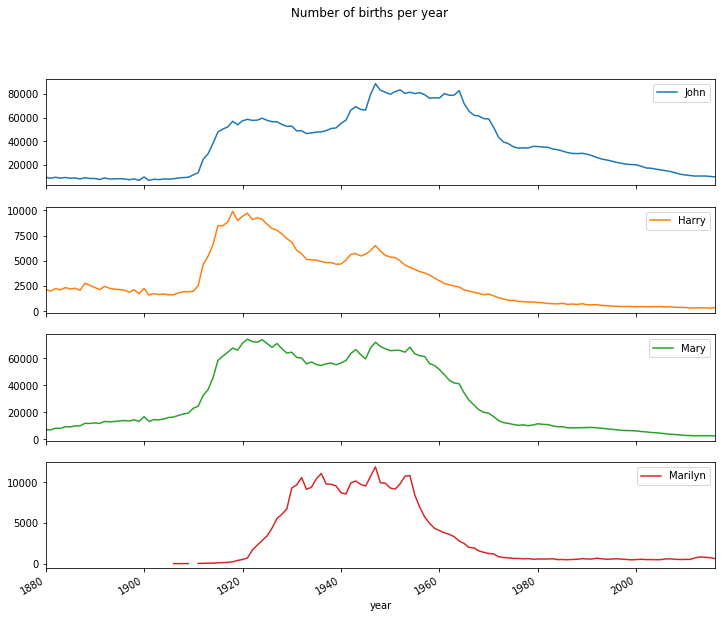

In [37]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [38]:
# fewer parents are choosing common names for their children?
# This hypothesis can be explored and confirmed in the data. 
# One measure is the proportion of births represented by the top 1000 most popular names:


/Users/congchen/Library/Python/3.6/lib/python/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/Users/congchen/Library/Python/3.6/lib/python/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


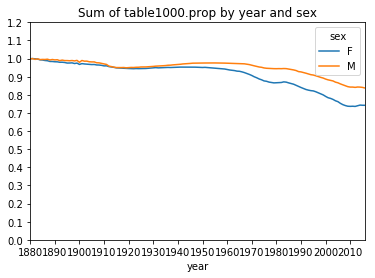

In [39]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [52]:
df = boys[boys.year == 2010]


In [43]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1677643        Jacob   M   22110  2010  0.011544
         1677644        Ethan   M   17995  2010  0.009395
         1677645      Michael   M   17336  2010  0.009051
         1677646       Jayden   M   17163  2010  0.008961
         1677647      William   M   17042  2010  0.008898
         1677648    Alexander   M   16749  2010  0.008745
         1677649         Noah   M   16442  2010  0.008584
         1677650       Daniel   M   15827  2010  0.008263
         1677651        Aiden   M   15531  2010  0.008109
         1677652      Anthony   M   15482  2010  0.008083
         1677653       Joshua   M   15432  2010  0.008057
         1677654        Mason   M   14837  2010  0.007746
         1677655  Christopher   M   14263  2010  0.007447
         1677656       Andrew   M   14234  2010  0.007432
         1677657        David   M   14181  2010  0.007404
         1677658      Matthew   M   14119  2010  0.007372
         1677659        Logan   M   14015  2010  0.007317
         1677660       Elijah   M   13879  2010  0.007246
         1677661        James   M   13870  2010  0.007242
         1677662       Joseph   M   13816  2010  0.007213
         1677663      Gabriel   M   12865  2010  0.006717
         1677664     Benjamin   M   12427  2010  0.006488
         1677665         Ryan   M   11967  2010  0.006248
         1677666       Samuel   M   11954  2010  0.006241
         1677667      Jackson   M   11813  2010  0.006168
         1677668         John   M   11550  2010  0.006030
         1677669       Nathan   M   11368  2010  0.005935
         1677670     Jonathan   M   11116  2010  0.005804
         1677671    Christian   M   11090  2010  0.005790
         1677672         Liam   M   10927  2010  0.005705
...                       ...  ..     ...   ...       ...
         1678614      Ronaldo   M     203  2010  0.000106
         1678615         Yair   M     203  2010  0.000106
         1678613       Lathan   M     203  2010  0.000106
         1678616       Gibson   M     202  2010  0.000105
         1678617        Keyon   M     202  2010  0.000105
         1678618       Reagan   M     202  2010  0.000105
         1678619       Daylen   M     201  2010  0.000105
         1678620     Kingsley   M     201  2010  0.000105
         1678621        Talan   M     201  2010  0.000105
         1678622       Yehuda   M     201  2010  0.000105
         1678625       Jordon   M     200  2010  0.000104
         1678627        Slade   M     200  2010  0.000104
         1678626      Sheldon   M     200  2010  0.000104
         1678624      Dashawn   M     200  2010  0.000104
         1678623    Cristofer   M     200  2010  0.000104
         1678628     Clarence   M     199  2010  0.000104
         1678629       Dillan   M     199  2010  0.000104
         1678630        Kadin   M     199  2010  0.000104
         1678631        Masen   M     199  2010  0.000104
         1678632        Rowen   M     199  2010  0.000104
         1678633      Clinton   M     198  2010  0.000103
         1678634     Thaddeus   M     198  2010  0.000103
         1678635       Yousef   M     198  2010  0.000103
         1678636       Truman   M     197  2010  0.000103
         1678641       Joziah   M     196  2010  0.000102
         1678644       Simeon   M     196  2010  0.000102
         1678643       Reuben   M     196  2010  0.000102
         1678642      Keshawn   M     196  2010  0.000102
         1678639      Eliezer   M     196  2010  0.000102
         1678640        Enoch   M     196  2010  0.000102

[1000 rows x 5 columns]

In [45]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1677643    0.011544
           1677644    0.020939
           1677645    0.029990
           1677646    0.038951
           1677647    0.047849
           1677648    0.056593
           1677649    0.065178
           1677650    0.073441
           1677651    0.081550
           1677652    0.089633
Name: prop, dtype: float64

In [56]:
prop_cumsum.searchsorted(0.5)

array([116])

In [59]:
df2=boys[boys.year == 1900]
in1900 = df2.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25])

In [62]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False) 
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count) 
diversity = diversity.unstack('sex')
diversity.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [50]:
diversity.plot(title="Number of popular names in top 50%")
# TypeError: Empty 'DataFrame': no numeric data to plot
# Solution:

TypeError: Empty 'DataFrame': no numeric data to plot

## Boy names that became girl names (and vice versa)

In [63]:
# a list of names occurring in the dataset starting with 'lesl':
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [64]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376857
Lesly      11432
Name: births, dtype: int64

In [67]:
# aggregate by sex and year and normalize within year
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0) 
table

/Users/congchen/Library/Python/3.6/lib/python/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
/Users/congchen/Library/Python/3.6/lib/python/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


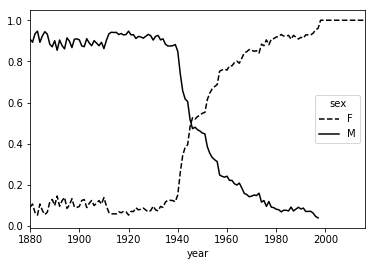

In [68]:
# make a plot of the breakdown by sex over time：
table.plot(style={'M': 'k-', 'F': 'k--'})